# url: https://www.datacurrent.co.jp/column/tech_column-datavisualization_for_correlation_analysis20220525/

In [1]:
pip install japanize_matplotlib

# データセットの確認と準備

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import japanize_matplotlib

from sklearn.datasets import fetch_california_housing

今回使うデータはこちらです。 日本語に翻訳したもので見ていきたいと思います。
California Housing dataset

データの内容について一部日本語に翻訳したものを転載します。

---

ターゲット変数はカリフォルニア州の住宅価格の中央値で、数十万ドル（$100,000）単位で表示される。

このデータセットは、1990年の国勢調査から得られたもので、国勢調査ブロックグループごとに1行ずつ使用されている。ブロックグループとは、米国国勢調査局が標本データを公表している最小の地理的単位である（ブロックグループの人口は通常600～3,000人である）。

世帯とは、家庭内に居住する人々の集団のことです。このデータセットでは、1世帯あたりの平均部屋数と平均寝室数を提供しているため、別荘地など世帯数が少なく空家が多いブロックグループでは、これらの列が突出して大きな値を取ることがあります。

In [3]:
# データを読み込みます。以降の見やすさのためカラム名は日本語に変換しておきます。
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df["HousePrice"] = pd.Series(california_housing.target)
df = df.rename(columns={
    "MedInc": "所得中央値",
    "HouseAge": "築年数中央値",
    "AveRooms": "1世帯あたりの平均部屋数",
    "AveBedrms": "1世帯あたりの平均寝室数",
    "Population": "人口",
    "AveOccup": "平均世帯人員",
    "Latitude": "緯度",
    "Longitude": "経度",
    "HousePrice": "住宅価格",
})

df.head(10)

,所得中央値,築年数中央値,1世帯あたりの平均部屋数,1世帯あたりの平均寝室数,人口,平均世帯人員,緯度,経度,住宅価格
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


所得中央値


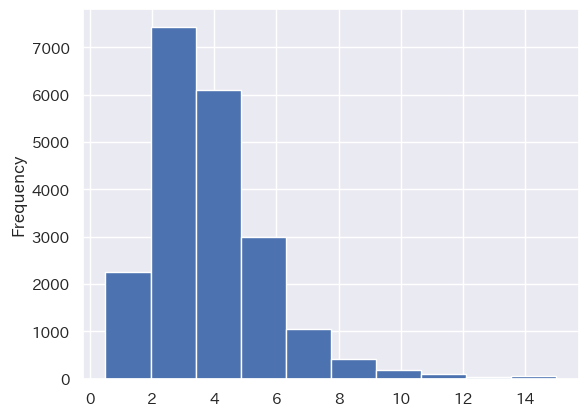

築年数中央値


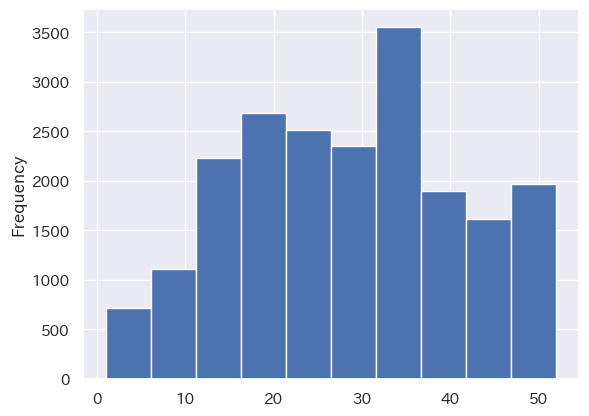

1世帯あたりの平均部屋数


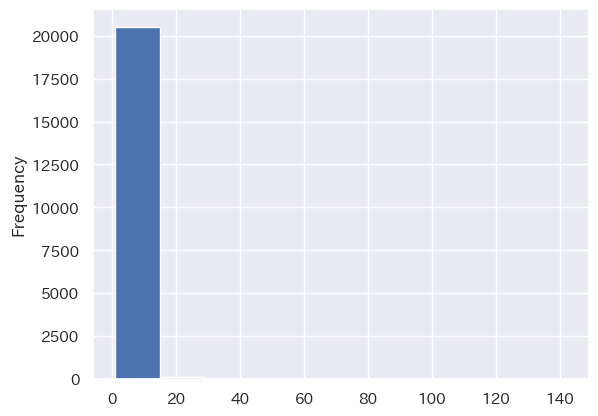

1世帯あたりの平均寝室数


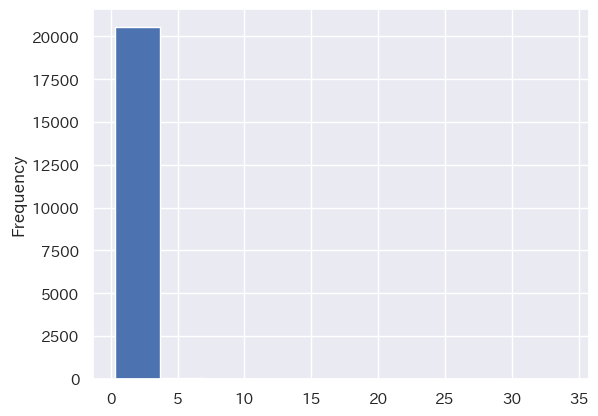

人口


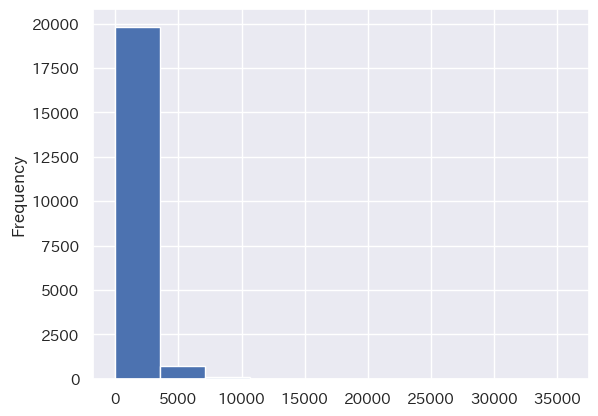

平均世帯人員


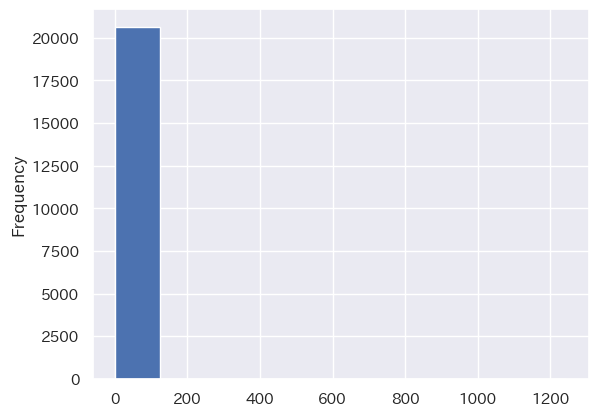

緯度


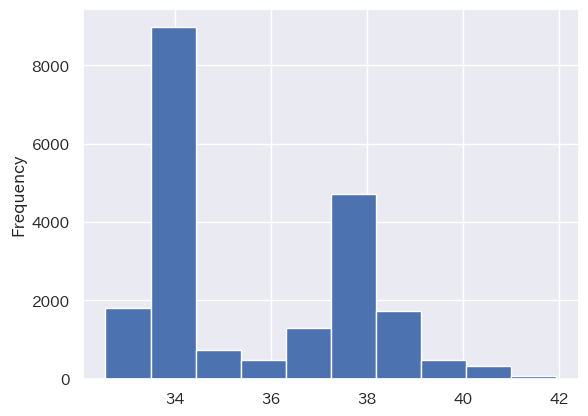

経度


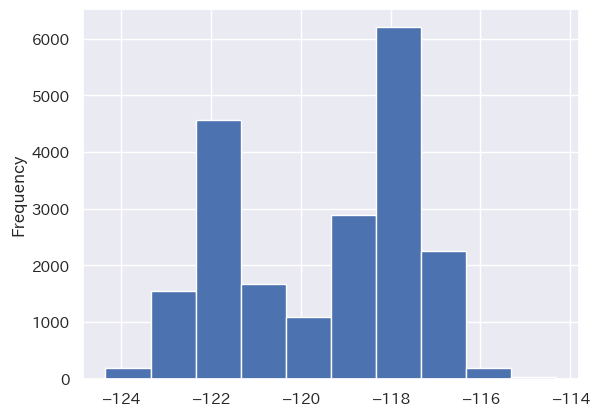

住宅価格


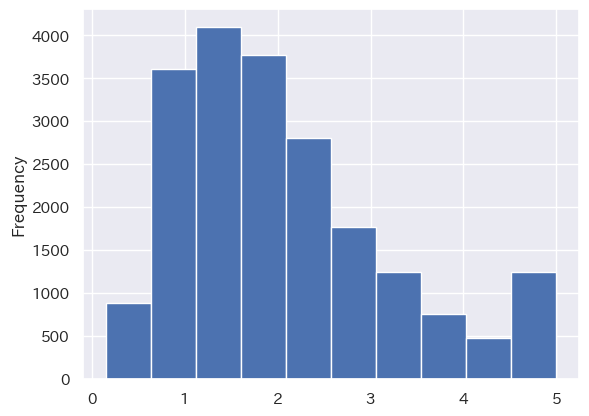

In [4]:
# まず全体の傾向をヒストグラムで見てみます。（さっそくseabornではなく、Pandasのplotを使っていますがご容赦下さい。）

for col in df:
    print(col)
    df[col].plot.hist()
    plt.show()

In [5]:
# 後の可視化のために住宅価格TOP100フラグを作成しておきます。
df["住宅価格top100"] = df.index.isin(df["住宅価格"].rank().sort_values().tail(100).index).astype(int)

# 散布図

散布図は２変数間の関係性を確認することができます。
相関係数の詳細はwikipediaに譲りますが、２変数間に線形関係が見られる場合に相関係数は高くなります。線形ではないものの、明らかに何かしらの特徴が見られても相関係数の数値だけを見ているとそれに気付けません。そういった事があり得るので散布図で視覚的に見ておくことは重要かなと思います。

<Axes: xlabel='所得中央値', ylabel='住宅価格'>

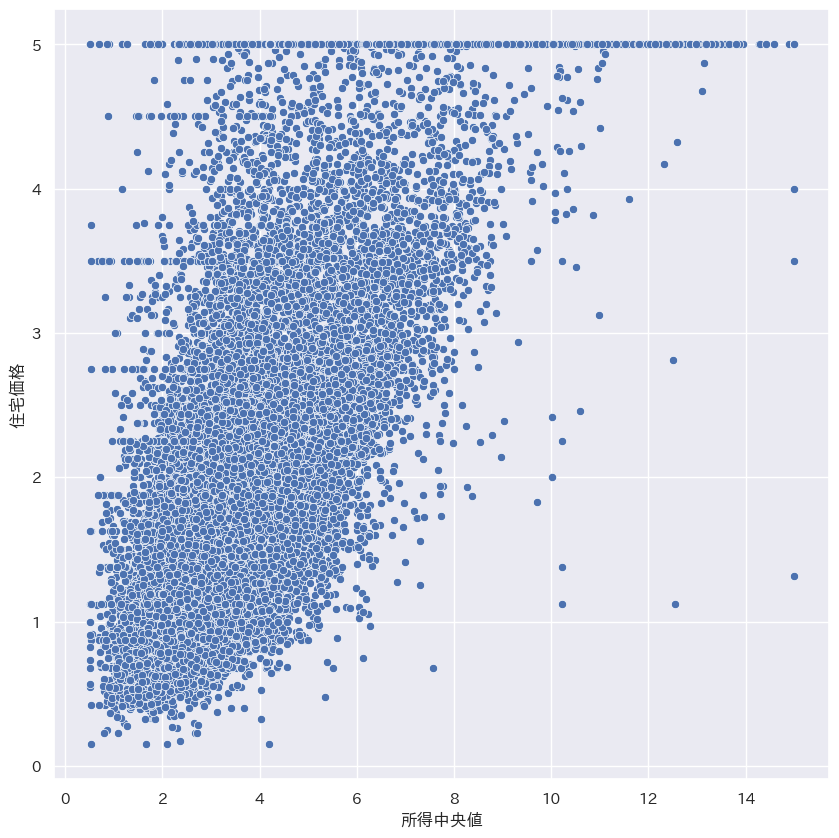

In [6]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="所得中央値", y="住宅価格")

In [7]:
# 若干ですが正の相関があるように見えます。可視化するにはレコード数が多いので次からは少しサンプリングして行きます。
sample = df.sample(1000, random_state=0).reset_index(drop=True)

<Axes: xlabel='所得中央値', ylabel='1世帯あたりの平均部屋数'>

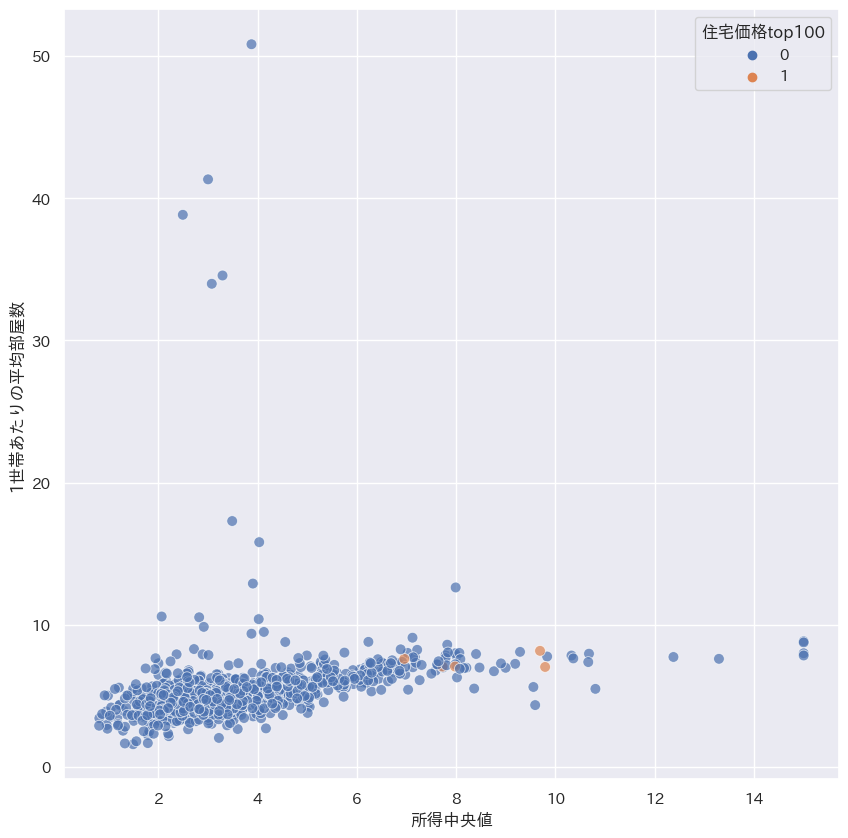

In [8]:
# ここからはseabornの見た目も少し考慮して、所得と部屋数を見ていきます。 hueを使う事で３つの変数の関係性を見ることができます。
plt.figure(figsize=(10,10))
sns.scatterplot(data=sample, x="所得中央値", y="1世帯あたりの平均部屋数", hue="住宅価格top100", s=60, alpha=.7)

# 上部の方を見ると部屋数が異常に多い住宅があるようです。
# 部屋数が多い＝住宅価格が高いわけでもなさそうです。
# またピアソンの相関係数は外れ値の影響を強く受けるので除外するのも一つの手かもしれません。

<Axes: xlabel='所得中央値', ylabel='築年数中央値'>

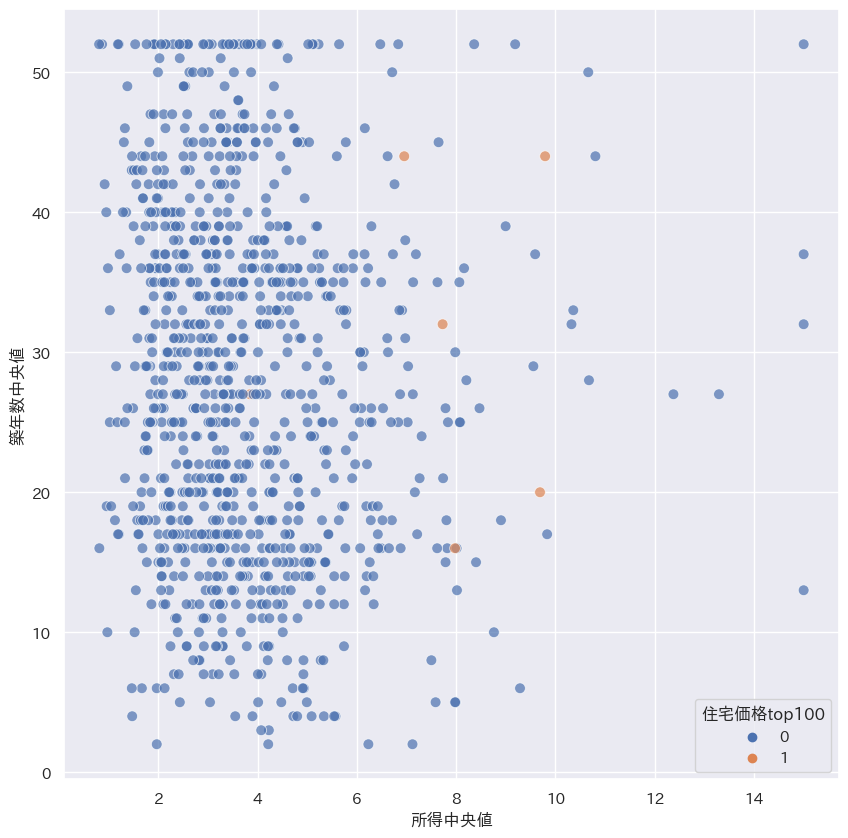

In [9]:
# 所得と築年数の関係も見ていきます。
plt.figure(figsize=(10,10))
sns.scatterplot(data=sample, x="所得中央値", y="築年数中央値", hue="住宅価格top100", s=60, alpha=.7)

# やはり所得が高い人達はtop100の住宅に住んでいる傾向があるように見えますね。
# ただ築年数と所得には関係性はないようです。

# バブルチャート

散布図の応用みたいなところでバブルチャートがあるかと思います。２変数間のプロットをするところは散布図と同じですが、プロットした点に大きさを持たせます。 一つ前の図と見比べるとこちらのほうが得られる情報が多いことが分かります。

<Axes: xlabel='所得中央値', ylabel='築年数中央値'>

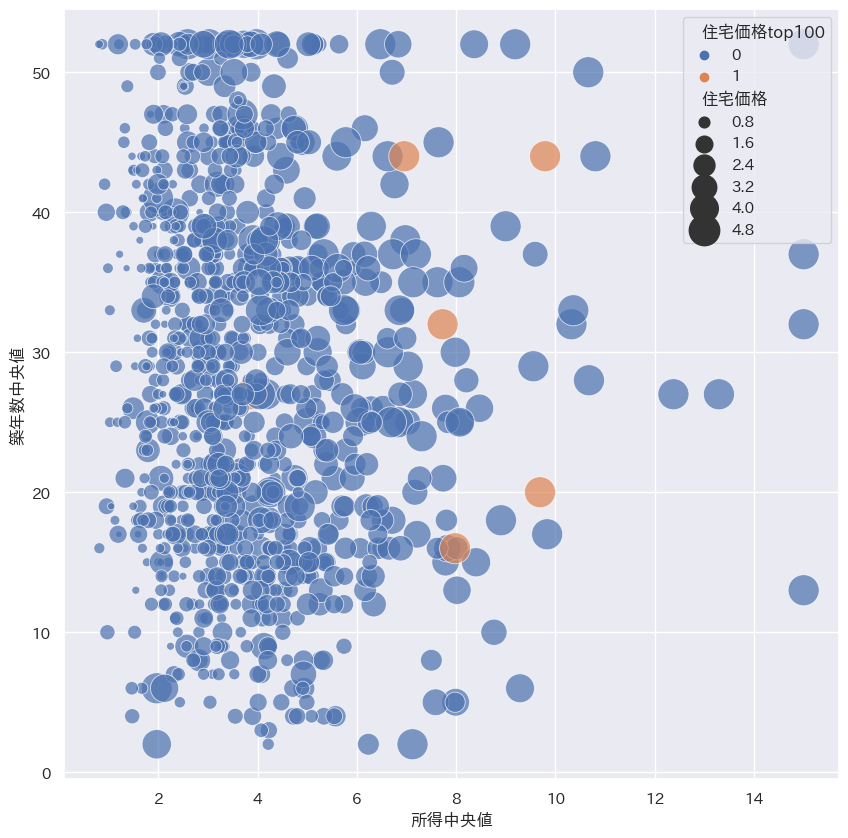

In [10]:
# scatterplotの引数内にsizeとsizesが追加されたらバブルチャートを作成できる

# この例では、size="住宅価格"として、各点のサイズを住宅価格に対応させています。
# sizes=(10, 500)はサイズの範囲を指定しており、s=60はデフォルトの点のサイズを指定しています。
# バブルチャートでは、sizeパラメータに対応する列の値に基づいて点のサイズが変わります。

plt.figure(figsize=(10,10))

sns.scatterplot(
    data=sample, x="所得中央値", y="築年数中央値", hue="住宅価格top100", size="住宅価格",
    sizes=(10, 500), s=60, alpha=.7
)

# ペアプロット

データの変数の数が多い場合はペアプロットという可視化ができます。seabornのペアプロットを使う事が多いですが、ラベル別に色分けしてくれたり、対角線は完全な相関があるため表示する意味がないのでそこにヒストグラムを表示してくれたりします。ラベルがある場合はラベル別のヒストグラムを出力できるので概観するのによく使います。

<Figure size 1000x1000 with 0 Axes>

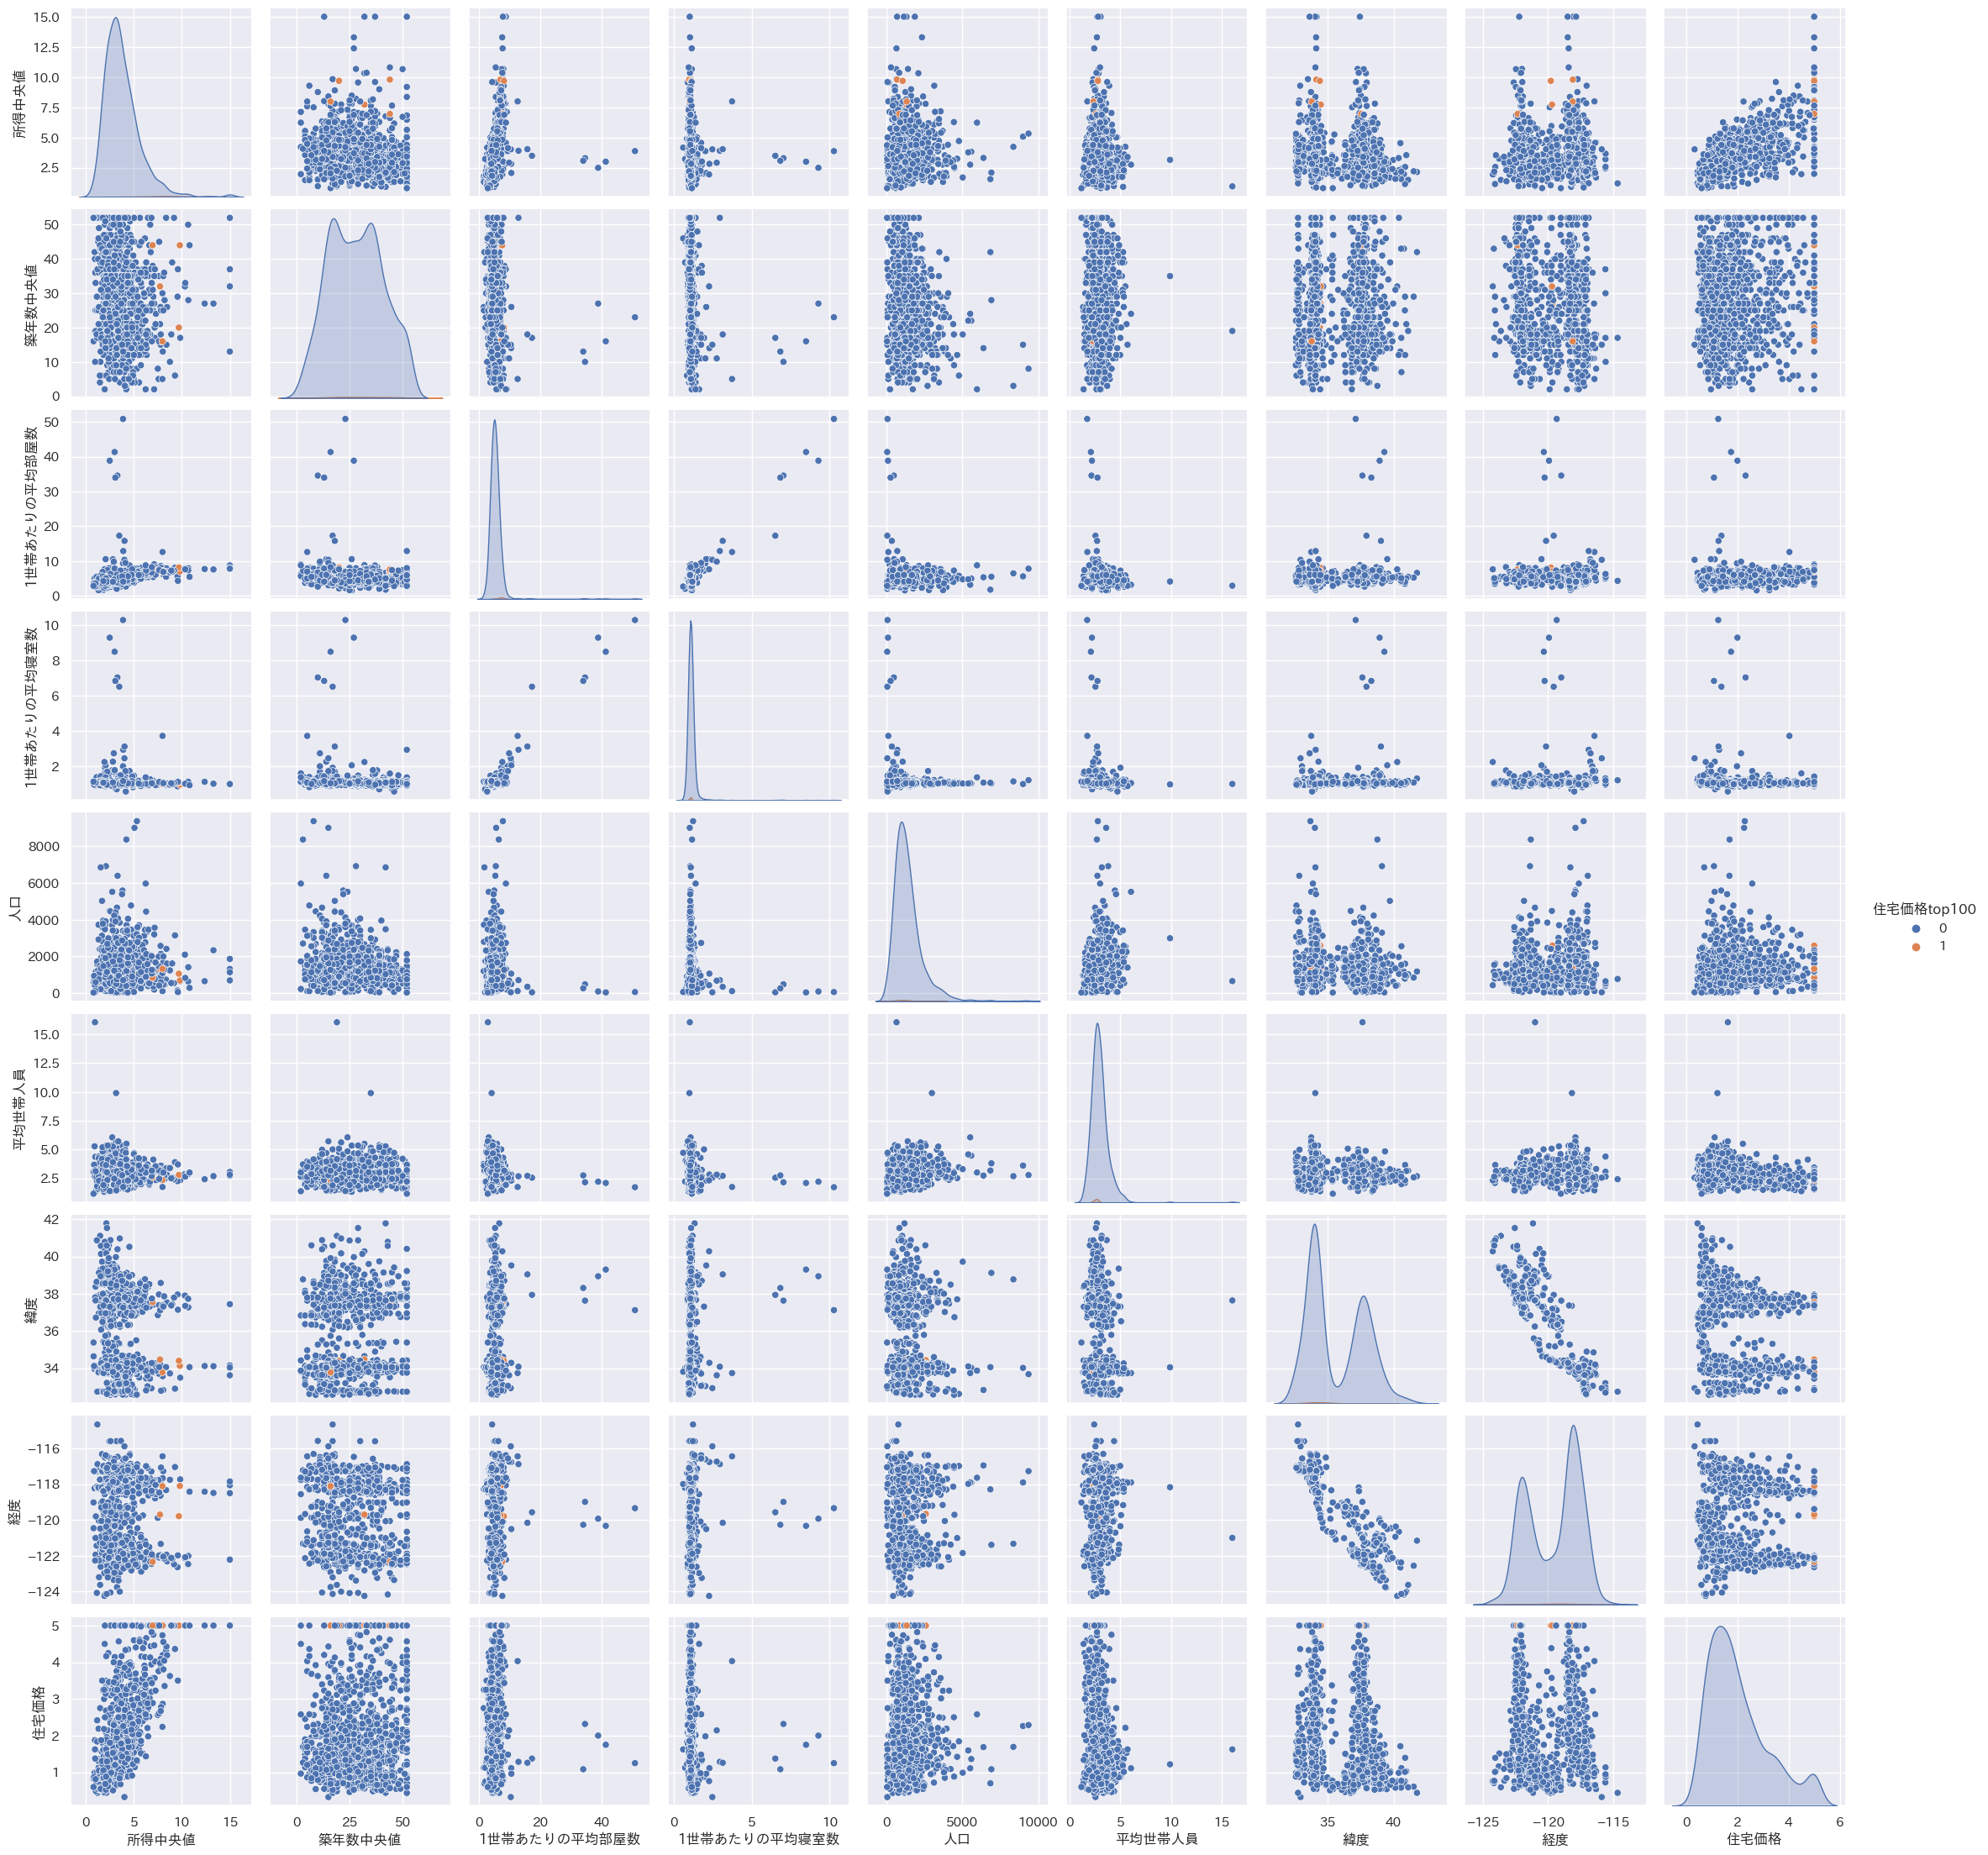

In [11]:
plt.figure(figsize=(10,10))
sns.pairplot(sample, hue="住宅価格top100", height=2.5)

# ヒートマップ

これまではグラフを見てきましたが、２変数間の相関係数を計算して相関行列を作る事も多いです。

例えばこのようなものですが、相関計数の値によって色を付けてくれますので、これも概観する時に便利です。

データの変数の数が多い場合には特に有用かと思います。

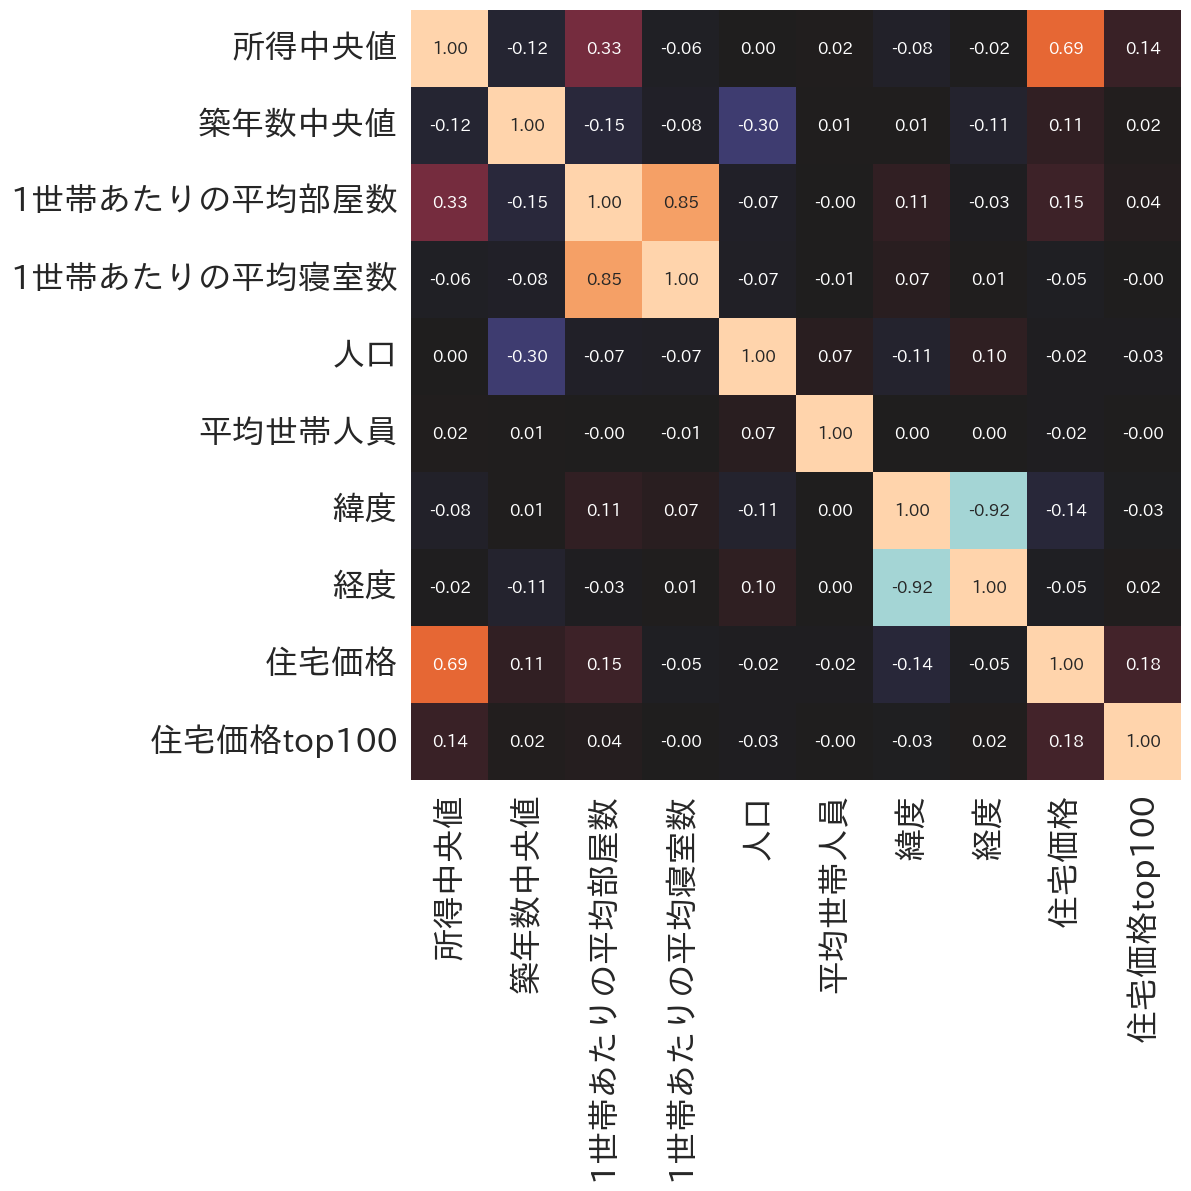

In [12]:
plt.figure(figsize=(10,10))
options = {'square':True, 'annot':True, 'fmt':'0.2f', 'xticklabels':df.columns, 'yticklabels':df.columns, 'annot_kws':{'size':12}, 'vmin':-1,'vmax':1,'center':0, 'cbar':False}
ax = sns.heatmap(df.corr(), **options)

ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)